In [ ]:
from pubchempy import *
import pandas as pd

xlsxFile = 'A:/BIOINFORMAICS/Machine Learning/Machine learning/docs/Pubchem_melting_dataset_fromXML.xlsx'
excel = pd.read_excel(xlsxFile, sheet_name='cleaned_set')
pubchem_data = []
for i in range(100):
    pubchem_data.append(excel.iloc[i][0])
print(pubchem_data)

In [ ]:
from urllib.request import urlopen
from urllib.parse import quote

def smiles(identifire):
    try:
        url = 'https://cactus.nci.nih.gov/chemical/structure/'+quote(identifire)+'/smiles'
        out = urlopen(url).read().decode('utf-8')
        return out
    except:
        return 'nan'

smile_data = []
for i in pubchem_data:
    smile_data.append(smiles(i))
    print(smiles(i))

In [ ]:
from deep_algorithm import activation_

def node(features, w_s, bias=1.0):
    y_ = 0.0
    for f, w in zip(features, w_s):
        y_ += f*w
    return activation_(y_+bias).sig() 

node([0.33, 0.32, 0.251, 0.41], [0.0, 0.0, 0.0, 0.0])

In [22]:
def gradient_descent(x, y, w, b, alpha=0.0001):
    w_d = []
    b_d = 0.0
    N = len(x)
    for i in range(N):
        wx = 0.0
        for j in range(len(x[0])):
            wx += w[i][j]*x[i][j]
            w_d.append(-2*x[i][j]*(y[i]-(wx+b)))
        # b_d += -2*(y[j]-(w*x[j]+b))
    w = []
    for i in range(len(w_d)):
        w.append(w[-1] - (1/float(N))*w_d[i]*alpha)
    # b = b - (1/float(N))*b_d*alpha
    return w

X = [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], 
        [4.6, 3.1, 1.5, 0.2], [5, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4]]
Y = [7.2636, 17.2632, 92.32334, 51.7612, 28.7214, 29.24]
W = [0.0, 0.0, 0.0, 0.0]
gradient_descent(X, Y, W, 0.0)

TypeError: 'float' object is not subscriptable

In [ ]:
import _DATA_processing as ln
import matplotlib.pyplot as plt

def gradient_descent(x, y, w, b, alpha=0.0001):
    w_d = 0.0
    b_d = 0.0
    N = len(x)
    for j in range(N):
        w_d += -2*x[j]*(y[j]-(w*x[j]+b))
        b_d += -2*(y[j]-(w*x[j]+b))

    w = w - (1/float(N))*w_d*alpha
    b = b - (1/float(N))*b_d*alpha
    return w, b

def train_model(x, y, w, b, epoch, check_loss, alpha=0.001):
    loss = []
    for i in range(epoch):
        w, b = gradient_descent(x, y, w, b, alpha)

        if i % check_loss == 0:
            loss.append(ln.loss_function(y, x, w, b).L2_loss())
            print(f'l2 loss on epoch {i}: {ln.loss_function(y, x, w, b).L2_loss()}')
    return w, b, loss

X = [5.1, 3.5, 1.4, 0.2, 4.9, 3.0]
Y = [0.072636, 0.172632, 0.9232334, 0.517612, 0.287214, 0.0292334]
loss = train_model(X, Y, 0.0, 0.0, 6, 1, alpha=0.0001)[2]
iteration = [i for i in range(6)]

plt.plot(iteration, loss, 'r')
plt.xlabel('iteration')
plt.ylabel('loss')

In [11]:
import numpy as np

a = [[12,7,3],
     [4,5,6],
     [7,8,9]]
b = [[5,8,1,2],
     [6,7,3,0],
     [4,5,9,1]]

def concatenate(met_a, met_b, axis):
    e = []
    if axis == 1:
        for i, j in zip(met_a, met_b):
            e.append(i+j)
        return e
    elif axis == 0:
        return met_a+met_b

def shape(metrix):
    (cols, rows) = (0, 0)
    for i in metrix:
        rows+=1
    for j in metrix[0]:
        cols+=1
    return (rows, cols)

def ones(shape, multiply=1.0, type=float, metrixShape=1):
    metrix = []
    for r in range(shape[0]):
        cols = []
        for c in range(shape[1]):
            if type == int:
                cols.append(int(1.*multiply))
            else: cols.append(1.*multiply)
        metrix.append(cols)
    return metrix*metrixShape

def ones1D(num, multiply=1.0, type=float):
    met = []
    for i in range(num):
        if type == int:
            met.append(int(1.*multiply))
        else: met.append(1.*multiply)
    return met

def dot1D_2D(A, B):
    return [sum(i*j for i,j in zip(row, B)) for row in A]


a1 = [[1,5,6], [5,7,2]]
b1 = [3,5,7]
print(np.ones((1,3)))
print(ones((1,3)))
print(dot1D_2D(a1, b1))
# print(sum([a1[i]*b1[i] for i in range(len(b1))]))
np.dot(a1, b1)
# dot1D_2D(a, b)
# np.sum()
# concatenate(a, b, axis=0)

[[1. 1. 1.]]
[[1.0, 1.0, 1.0]]
[70, 64]


array([70, 64])

[1.1458553310121309, 1.7212572665496217, 1.4918238405220274, 1.2107086939030487, 1.0335728739971766]


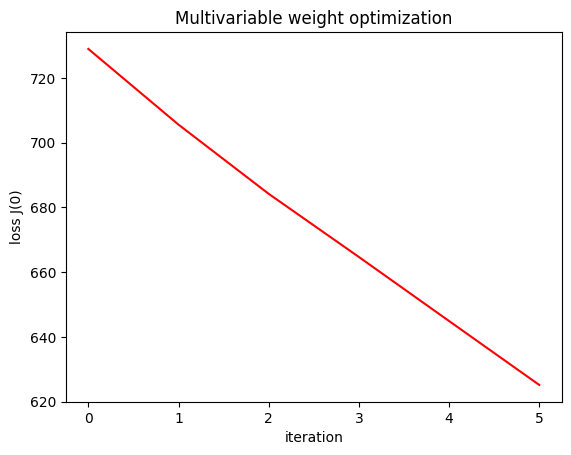

In [5]:
import matplotlib.pyplot as plt

def train_multivariate_model(X, y, epoch, lr=0.001):
    m = shape(X)[0] 
    one_met = ones((m, 1))

    X = concatenate(one_met, X, axis=1)
    n = shape(X)[1]
    theta = ones1D(n)
    hypothesis = dot1D_2D(X, theta)
    cost = ones1D(epoch)
    for i in range(0, epoch):
        # print(shape(X), theta[0])
        theta[0]=theta[0]-(lr/shape(X)[0])*sum([h-y_ for h, y_ in zip(hypothesis, y)])
        for j in range(1, n):
            # print('j: ', theta[j], X)
            theta[j]=theta[j]-(lr/shape(X)[0])*sum([(h-y_)*X[i][j] for h, y_ in zip(hypothesis, y)])
            # print('j af.: ', j)
        hypothesis = dot1D_2D(X, theta)
        cost[i]=1/(2*m)*sum([(h-y_)**2 for h, y_ in zip(hypothesis, y)])
    
    return cost, theta

X = [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], 
        [4.6, 3.1, 1.5, 0.2], [5, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4]]
Y = [7.2636, 17.2632, 92.32334, 51.7612, 28.7214, 29.24]
iteration = [i for i in range(6)]
loss = train_multivariate_model(X, Y, 6, lr=0.001)
print(loss[1])
plt.plot(iteration, loss[0], 'r')
plt.title('Multivariable weight optimization')
plt.xlabel('iteration')
plt.ylabel('loss J(0)')
plt.show()

# W[:2]

In [48]:
def addition(A, B):
    A_B = []
    for i in range(len(A)):
        AB = []
        for a, b in zip(A[i], B[i]):
            AB.append(a+b)
        A_B.append(AB)
    return A_B

def subtract(A, B):
    A_B = []
    for i in range(len(A)):
        AB = []
        for a, b in zip(A[i], B[i]):
            AB.append(a-b)
        A_B.append(AB)
    return A_B
    
def add_2D_1D(A, B):
    A_B = []
    for a in A:
        ab = []
        for i in range(len(a)):
            ab.append(a[i]+B[0][i])
        A_B.append(ab)
    return A_B

def subt_2D_1D(A, B):
    A_B = []
    for a in A:
        ab = []
        for i in range(len(a)):
            ab.append(a[i]-B[0][i])
        A_B.append(ab)
    return A_B

def determinant_2x2(matrix):
    return matrix[0][0]*matrix[1][1]-matrix[1][0]*matrix[0][1]


a_ = [[1,2,3], [4,5,6], [7,8,9]]
b = [[8,5],[4,5]]
b_ = [[10, 20, 30]]
subt_2D_1D(a_, b_)
determinant_2x2(b)

20

In [1]:
a = [[1,2,3], [4,5,6], [7,8,9]]
a1 = a[0]
a2 = a[1:]
removable = []

for j in range(len(a1)):
    e_i = []
    for i in range(len(a2)):
        e_i.append(a2[i][j])
    removable.append(e_i)

print(removable, '\t', a2)


[[4, 7], [5, 8], [6, 9]] 	 [[4, 5, 6], [7, 8, 9]]


In [55]:
a = [[4, 5, 6], [7, 8, 9]]
a[0].remove(5)
a

[[4, 6], [7, 8, 9]]